In [96]:
import numpy as np
import pandas as pd
import random
import shutil
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# BRAIN TUMOR DETECTION USING CNN:
- This project aims to detect presence of tumor in brain scan images with the help of a Convolutional Nueral Network.

## Importing required libraries:


In [ ]:
import numpy as np
import pandas as pd
import random
import shutil
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Importing Dataset:

In [97]:
tumor_dir='file_path_of_tumor_images'
healthy_dir='file_path_of_healthy_images'

## Creating dataframe of dataset images:

In [98]:
filepaths = []
label = []
dict_list = [tumor_dir, healthy_dir]

In [99]:
for i, j in enumerate(dict_list):
    f_list = os.listdir(j)
    for f in f_list:
        filepaths.append(os.path.join(j,f))
        if i == 0:
            label.append('tumor')
        else:
            label.append('healthy')
df = pd.DataFrame({'filepath':filepaths, 'label':label})
df.head()

,filepath,label
0,../input/brian-tumor-dataset/Brain Tumor Data ...,tumor
1,../input/brian-tumor-dataset/Brain Tumor Data ...,tumor
2,../input/brian-tumor-dataset/Brain Tumor Data ...,tumor
3,../input/brian-tumor-dataset/Brain Tumor Data ...,tumor
4,../input/brian-tumor-dataset/Brain Tumor Data ...,tumor


In [100]:
df['label'].value_counts(), df.shape

(label
 tumor      2513
 healthy    2087
 Name: count, dtype: int64,
 (4600, 2))

# Dividing dataframe into train(80%) and test(20%) dataframe:

In [101]:
train, val = train_test_split(df, test_size = 0.2, random_state = 42)
train.shape, val.shape, train['label'].value_counts(), val['label'].value_counts()

((3680, 2),
 (920, 2),
 label
 tumor      1992
 healthy    1688
 Name: count, dtype: int64,
 label
 tumor      521
 healthy    399
 Name: count, dtype: int64)

## Generating Train and test sets to train our model:

In [102]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(rescale = 1./255)
train_set = image_gen.flow_from_dataframe(dataframe= train,x_col="filepath",y_col="label",
                                      target_size=(150,150),
                                      color_mode='grayscale',
                                      class_mode="binary", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
val_set = image_gen.flow_from_dataframe(dataframe= val,x_col="filepath", y_col="label",
                                    target_size=(150,150),
                                    color_mode= 'grayscale',
                                    class_mode="binary",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 3680 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


## Displaying some random images from train set:

In [103]:
def show_brain_images(image_gen):
    test_dict = val_set.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

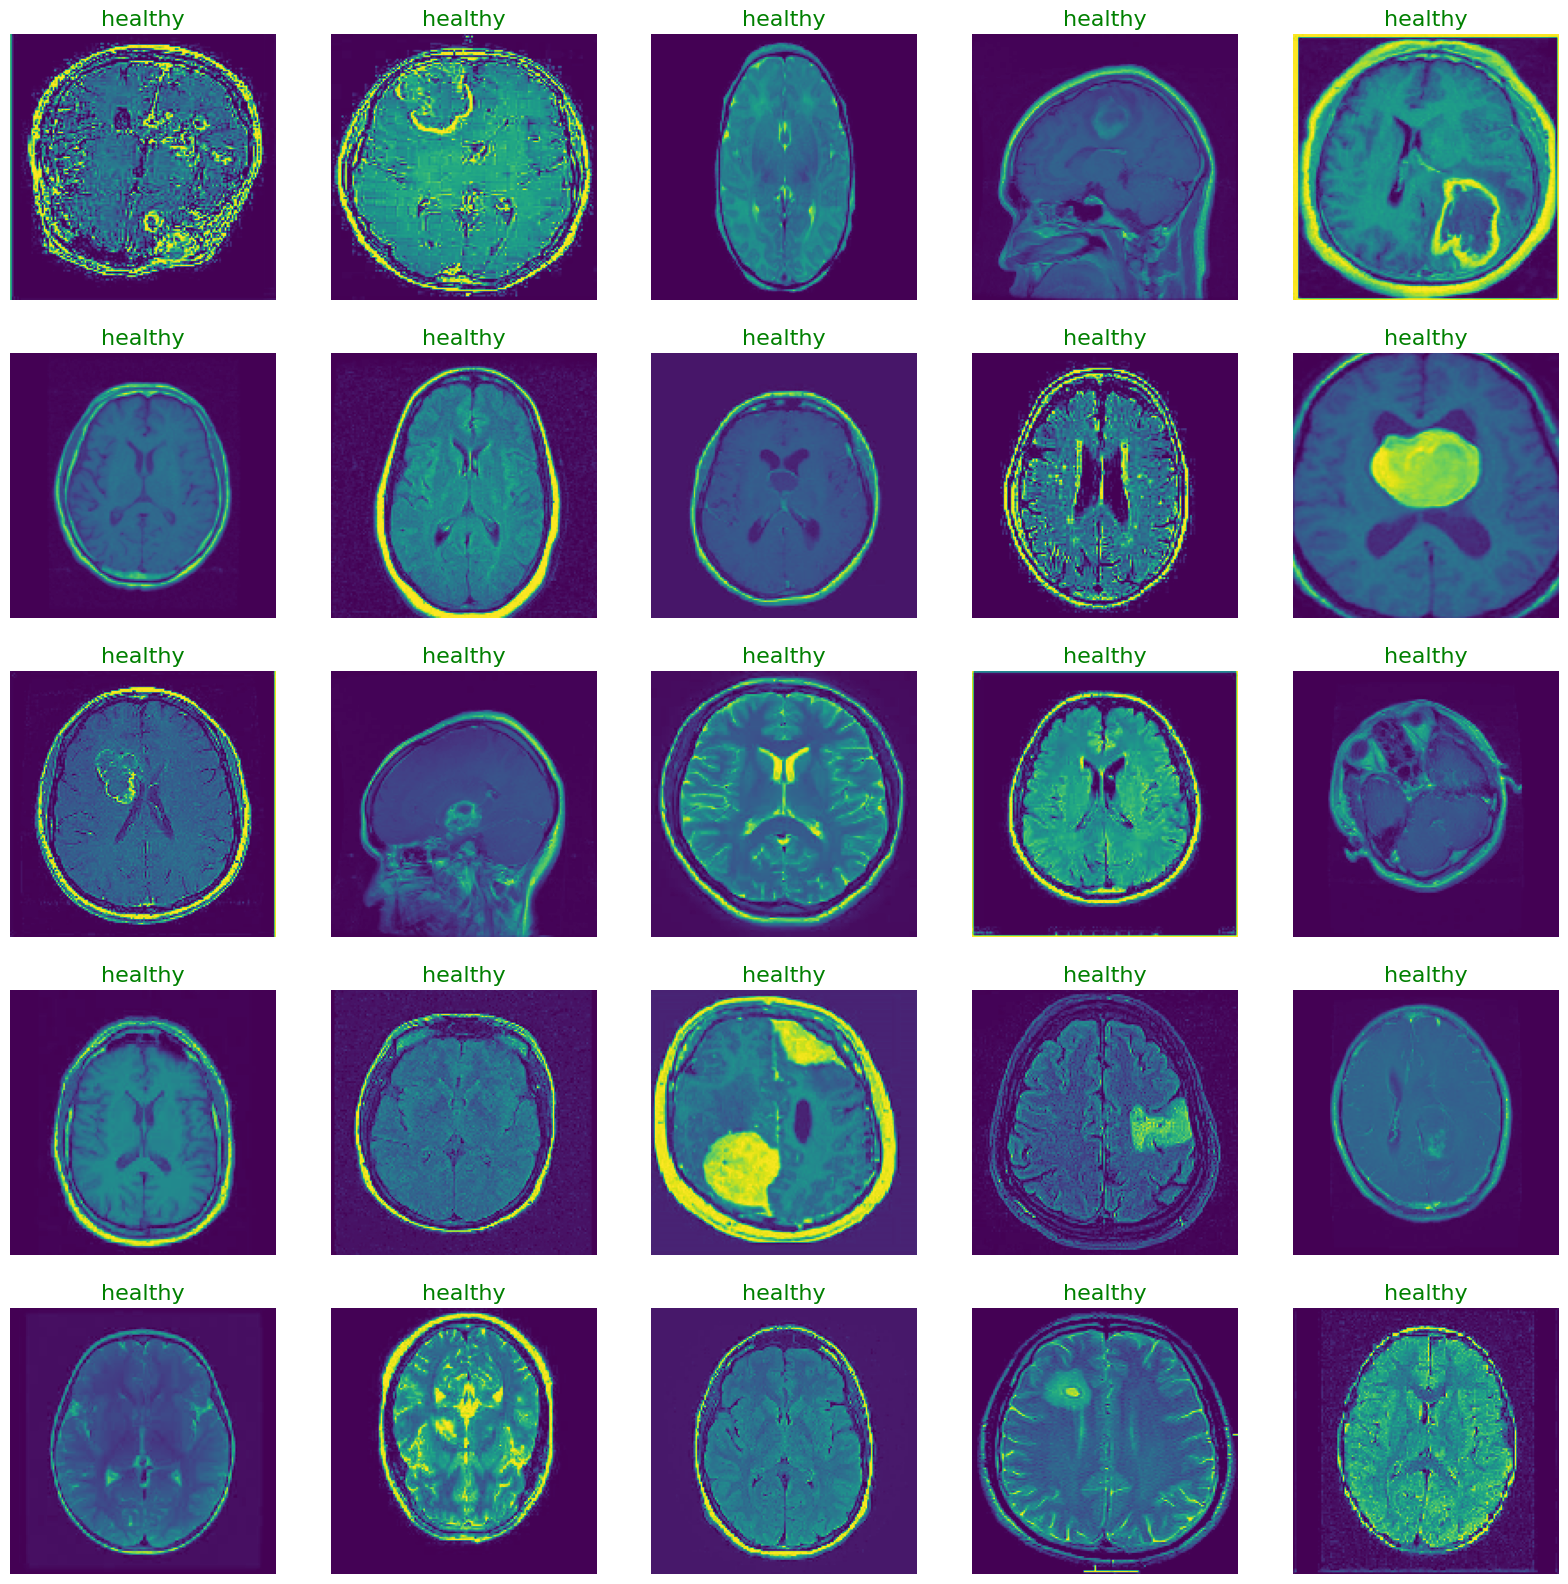

In [104]:
show_brain_images(train_set)

In [105]:
classes=list(train_set.class_indices.keys())
print (classes)

['healthy', 'tumor']


## Training Model:

In [106]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(150,150,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")])


In [107]:
model.compile(
        
        optimizer = tf.keras.optimizers.Adam(),
                                loss='binary_crossentropy',
                                metrics = ['accuracy'])

In [108]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights = True)
checkpoint = ModelCheckpoint("Model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [109]:
History = model.fit(train_set,verbose=1,callbacks = [early_stopping,checkpoint],epochs=10,validation_data=val_set)

Epoch 1/10
115/115 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.7253
Epoch 1: val_accuracy improved from -inf to 0.85870, saving model to Model.h5
115/115 [==============================] - 176s 1s/step - loss: 0.5696 - accuracy: 0.7253 - val_loss: 0.3405 - val_accuracy: 0.8587
Epoch 2/10
115/115 [==============================] - ETA: 0s - loss: 0.3057 - accuracy: 0.8687
Epoch 2: val_accuracy improved from 0.85870 to 0.88370, saving model to Model.h5
115/115 [==============================] - 125s 1s/step - loss: 0.3057 - accuracy: 0.8687 - val_loss: 0.2862 - val_accuracy: 0.8837
Epoch 3/10
115/115 [==============================] - ETA: 0s - loss: 0.1698 - accuracy: 0.9375
Epoch 3: val_accuracy improved from 0.88370 to 0.95217, saving model to Model.h5
115/115 [==============================] - 125s 1s/step - loss: 0.1698 - accuracy: 0.9375 - val_loss: 0.1444 - val_accuracy: 0.9522
Epoch 4/10
115/115 [==============================] - ETA: 0s - loss: 0.0951

## Evaluating Model:

<Axes: >

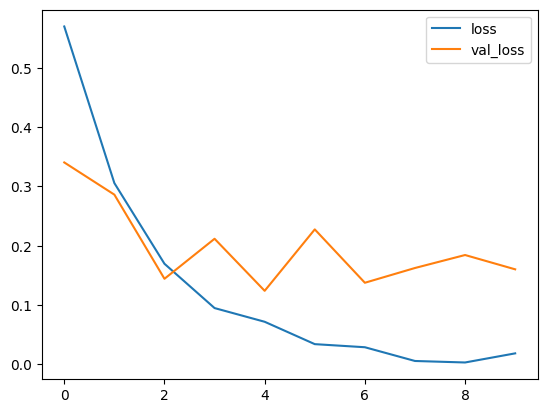

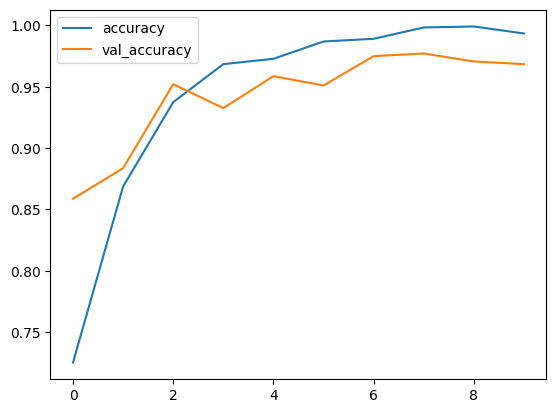

In [110]:
history_frame = pd.DataFrame(History.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [111]:
history_frame.head()

,loss,accuracy,val_loss,val_accuracy
0,0.569627,0.725272,0.340502,0.858696
1,0.305692,0.868750,0.286231,0.883696
2,0.169751,0.937500,0.144439,0.952174
3,0.095088,0.968478,0.211876,0.932609
4,0.071993,0.972826,0.124146,0.958696


In [112]:
evaluation = model.evaluate(val_set)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

29/29 [==============================] - 7s 250ms/step - loss: 0.1241 - accuracy: 0.9587
Loss: 0.12414635717868805
Accuracy: 0.958695650100708
